# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
outer_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
outer_merge_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
len(outer_merge_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



array(['g989'], dtype=object)

In [3]:
count_mouse_df = outer_merge_df.groupby(["Mouse ID", "Timepoint"]).size()
count_mouse_df = count_mouse_df.reset_index(name="Occurrence")
count_mouse_df = count_mouse_df.sort_values("Occurrence", ascending = False)

# Store Mouse ID with duplicates in a set to keep only unique Mouse ID
duplicate_mice = set()
for i in range(len(count_mouse_df)):
    if count_mouse_df.iloc[i, 2] > 1:
        duplicate_mice.add(count_mouse_df.iloc[i, 0])

duplicate_mice

{'g989'}

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [4]:
outer_merge_df = outer_merge_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
duplicate_mouse_df = outer_merge_df.loc[outer_merge_df["Mouse ID"] == "g989", :]
duplicate_mouse_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
908     g989          0           45.000000                 0     Propriva   
909     g989          0           45.000000                 0     Propriva   
910     g989          5           48.786801                 0     Propriva   
911     g989          5           47.570392                 0     Propriva   
912     g989         10           51.745156                 0     Propriva   
913     g989         10           49.880528                 0     Propriva   
914     g989         15           51.325852                 1     Propriva   
915     g989         15           53.442020                 0     Propriva   
916     g989         20           55.326122                 1     Propriva   
917     g989         20           54.657650                 1     Propriva   
918     g989         25           56.045564                 1     Propriva   
919     g989         30           59.082294                 1     Propriva   
920     g989         35           62.570880                 2     Propriva   

        Sex  Age_months  Weight (g)  
908  Female          21          26  
909  Female          21          26  
910  Female          21          26  
911  Female          21          26  
912  Female          21          26  
913  Female          21          26  
914  Female          21          26  
915  Female          21          26  
916  Female          21          26  
917  Female          21          26  
918  Female          21          26  
919  Female          21          26  
920  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [5]:
cleaned_mouse_df = outer_merge_df.loc[outer_merge_df["Mouse ID"] != "g989", :]
cleaned_mouse_df.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     k403          0           45.000000                 0     Ramicane   
1     k403          5           38.825898                 0     Ramicane   
2     k403         10           35.014271                 1     Ramicane   
3     k403         15           34.223992                 1     Ramicane   
4     k403         20           32.997729                 1     Ramicane   

    Sex  Age_months  Weight (g)  
0  Male          21          16  
1  Male          21          16  
2  Male          21          16  
3  Male          21          16  
4  Male          21          16

In [6]:
# Checking the number of mice in the clean DataFrame.


248

In [6]:
len(cleaned_mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [7]:
cleaned_mouse_df = cleaned_mouse_df.sort_values("Drug Regimen")
drug_regimen_list = cleaned_mouse_df["Drug Regimen"].unique()

summary_stat_drug_regimen = pd.DataFrame()
mean_value_list = []
median_value_list = []
variance_value_list = []
stddev_value_list = []
stderr_value_list = []

# Loop trhough regimen list and compute for mean, median, variance, std dev, std err
for regimen in drug_regimen_list:
    drug_tumor_series = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"]==regimen, "Tumor Volume (mm3)"]
    mean_value_list.append(drug_tumor_series.mean())
    median_value_list.append(drug_tumor_series.median())
    variance_value_list.append(drug_tumor_series.var())
    stddev_value_list.append(drug_tumor_series.std())
    stderr_value_list.append(sem(drug_tumor_series))

# Assemble summary dataframe
summary_stat_drug_regimen["Drug Regimen"] = drug_regimen_list
summary_stat_drug_regimen["Mean Tumor Volume"] = mean_value_list
summary_stat_drug_regimen["Median Tumor Volume"] = median_value_list
summary_stat_drug_regimen["Tumor Volume Variance"] = variance_value_list
summary_stat_drug_regimen["Tumor Volume Std. Dev."] = stddev_value_list
summary_stat_drug_regimen["Tumor Volume Std. Err."] = stderr_value_list
    
summary_stat_drug_regimen = summary_stat_drug_regimen.set_index("Drug Regimen")
summary_stat_drug_regimen

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [20]:
summary_stat_drug_agg_df = cleaned_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, sem])
summary_stat_drug_agg_df

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

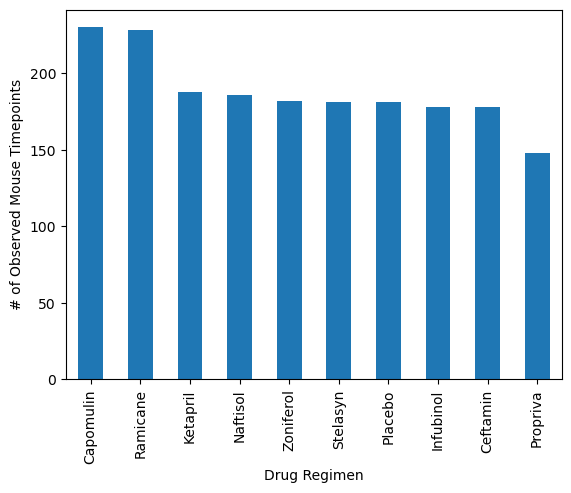

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


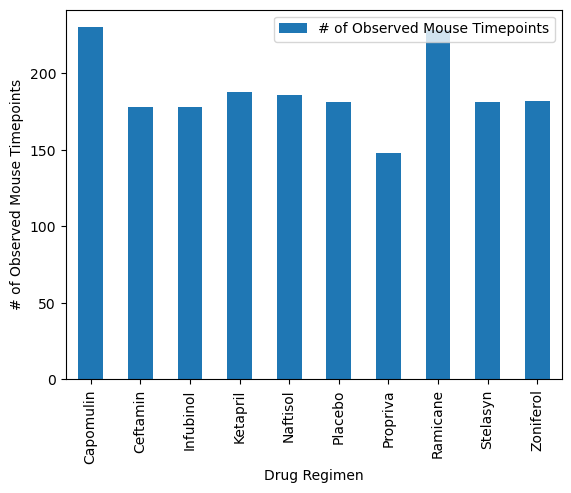

In [9]:
#Assemble dataframe to be plotted
mouse_id_timepoints_df = cleaned_mouse_df.groupby("Drug Regimen")[["Mouse ID", "Timepoint"]].size()
mouse_id_timepoints_df = mouse_id_timepoints_df.reset_index(name="# of Observed Mouse Timepoints")

bar_plot = mouse_id_timepoints_df.plot(kind="bar")
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of Observed Mouse Timepoints")

xticklabels = cleaned_mouse_df["Drug Regimen"].unique()
bar_plot.set_xticklabels(xticklabels)
plt.show()

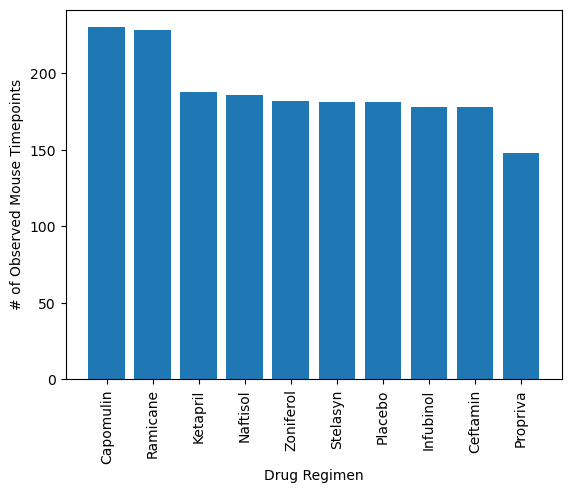

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


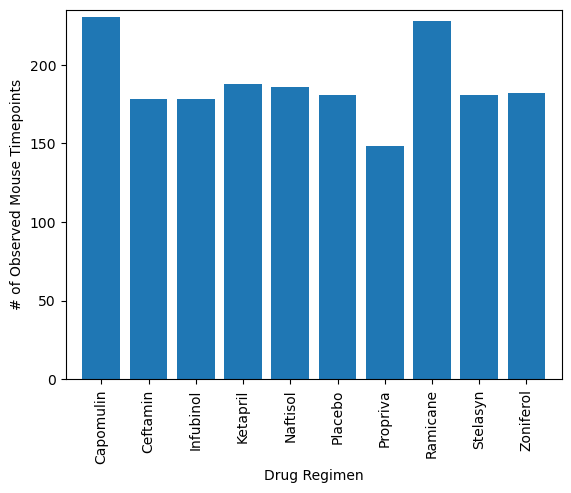

In [10]:
x_axis = np.arange(0, len(xticklabels))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

y_axis = mouse_id_timepoints_df["# of Observed Mouse Timepoints"]
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xlim(-0.75, len(xticklabels)-.25)
plt.ylim(0, max(y_axis) + 5)

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, xticklabels, rotation=90)
plt.show()

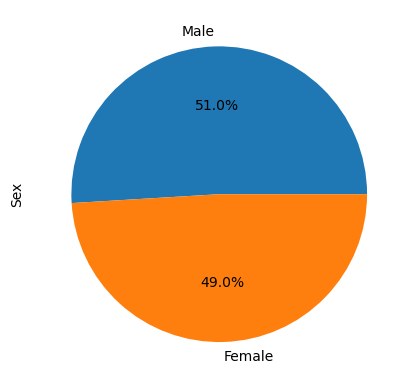

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [11]:
mouse_gender_df = cleaned_mouse_df.groupby("Sex")["Mouse ID"].count()

branch_pie = mouse_gender_df.plot(kind="pie", autopct='%1.1f%%')
branch_pie.set_ylabel("Sex")

plt.axis("equal")
plt.show()

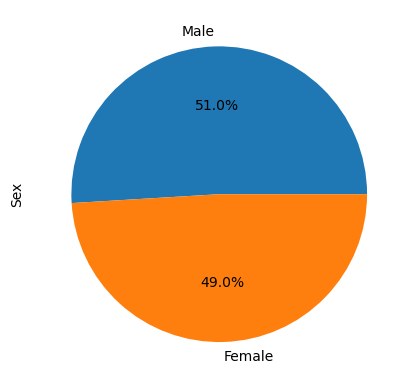

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


In [12]:

mouse_gender_df = mouse_gender_df.reset_index()
gender = mouse_gender_df["Sex"]
percentage = mouse_gender_df["Mouse ID"]

plt.pie(percentage, labels=gender, autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_last_timepoint_group = cleaned_mouse_df.groupby("Mouse ID")["Timepoint"]

mouse_last_timepoint_df = mouse_last_timepoint_group.agg(max)

mouse_last_timepoint_df = mouse_last_timepoint_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_tumor_merge_df = pd.merge(mouse_last_timepoint_df, outer_merge_df, on=["Mouse ID", "Timepoint"], how="inner")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_df = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in drug_regimen_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume = last_timepoint_tumor_merge_df.loc[last_timepoint_tumor_merge_df["Drug Regimen"]==regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_df["Tumor Volume (mm3)"] = pd.DataFrame(volume.tolist())
    tumor_vol_df[regimen] = pd.DataFrame(volume.tolist())
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_vol_df.loc[tumor_vol_df["Tumor Volume (mm3)"]<lower_bound, "Tumor Volume (mm3)"]
    print(f"{regimen} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


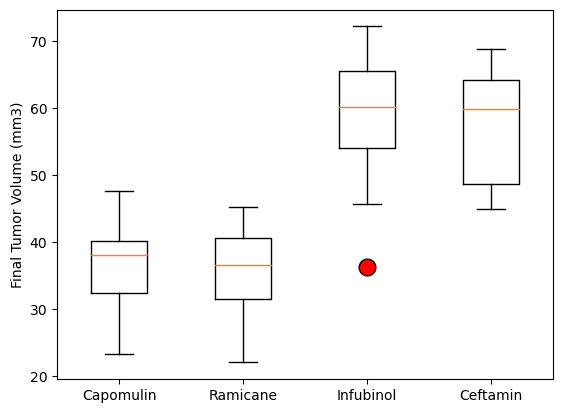

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


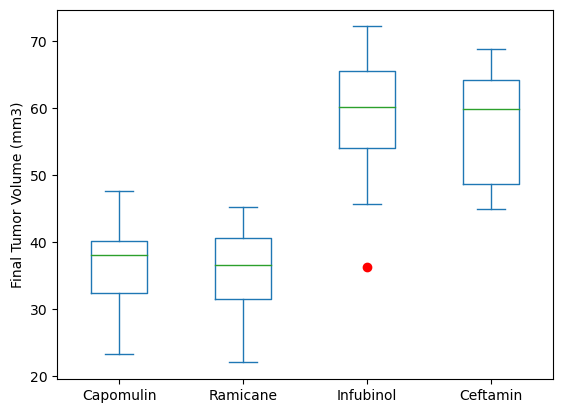

In [15]:
ax = tumor_vol_df[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]].plot(kind='box', sym='r')

ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

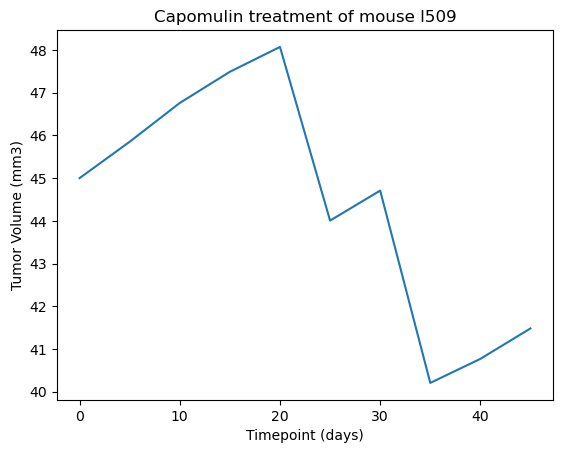

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


Text(0.5, 1.0, 'Capomulin treatment of mouse B128')

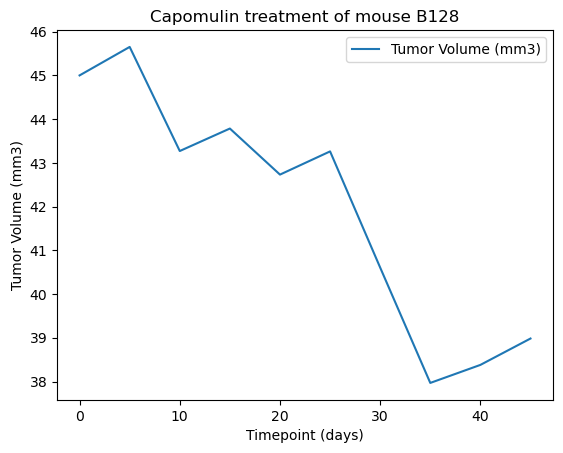

In [16]:
timepoint_tumor_df = cleaned_mouse_df.loc[(cleaned_mouse_df["Drug Regimen"]=="Capomulin") & (cleaned_mouse_df["Mouse ID"]=="b128"), ["Timepoint", "Tumor Volume (mm3)"]]
bar_plot = timepoint_tumor_df.plot("Timepoint", "Tumor Volume (mm3)")
bar_plot.set_xlabel("Timepoint (days)")
bar_plot.set_ylabel("Tumor Volume (mm3)")
bar_plot.set_title("Capomulin treatment of mouse B128")


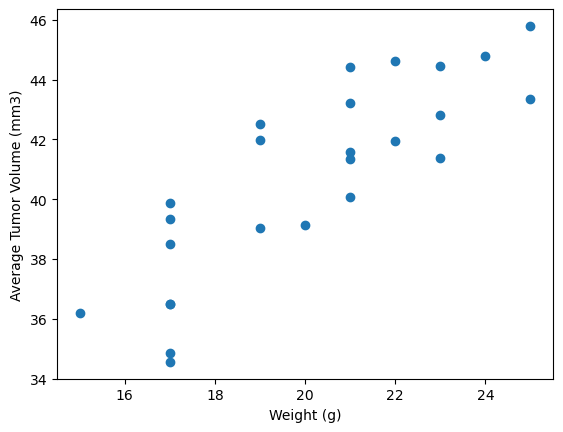

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


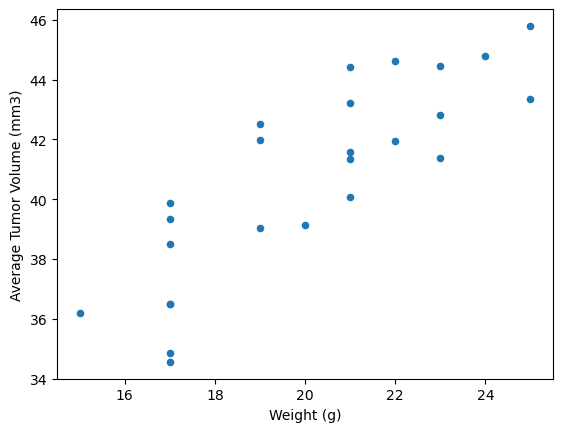

In [17]:
weight_tumor_df = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"]=="Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_tumor_df = weight_tumor_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()
weight_tumor_df = weight_tumor_df.reset_index(name="Average Tumor Volume (mm3)")

scatter_plot = weight_tumor_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


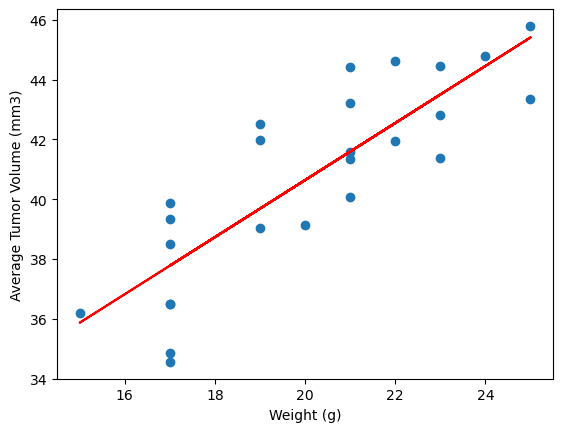

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [18]:
x_values = weight_tumor_df["Weight (g)"]
y_values = weight_tumor_df["Average Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values, y_values)
correlation
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


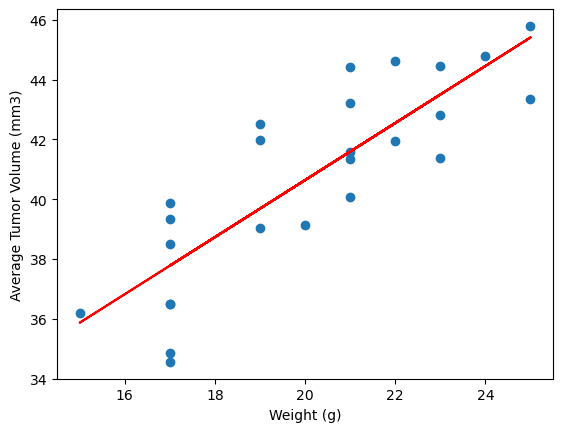

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()